In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

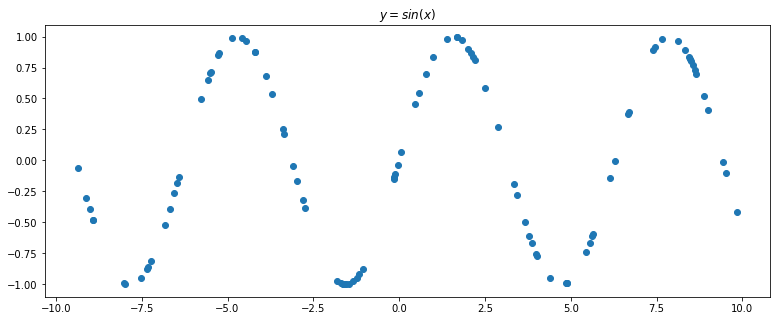

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

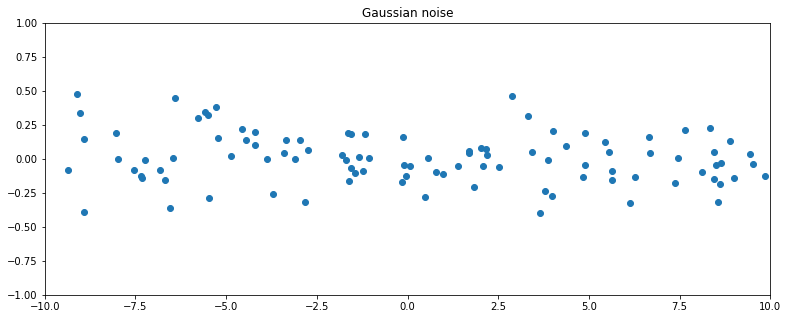

In [4]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

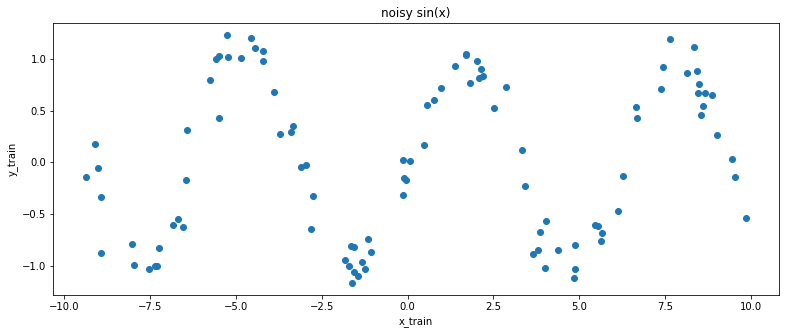

In [5]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [6]:
x_train

tensor([ 8.4423, -1.5614, -6.4189,  6.6668, -5.7671, -3.8863,  8.6495, -1.3435,
         3.4236, -8.0285, -5.4992, -3.7084,  5.4580, -1.1644, -1.5701, -5.5721,
         9.8518,  4.8507, -5.2706,  5.6321,  2.8722,  9.5233,  8.6091, -5.2351,
        -1.8176, -7.2349, -3.0941, -1.2412, -1.6210, -6.5498, -4.5730,  2.1508,
        -7.3511,  5.6498, -2.8135,  8.4913, -6.6861,  4.8837, -7.3161,  0.7725,
        -0.1467,  2.5146,  0.5774,  9.4360,  9.0060, -0.0370,  2.0844, -1.0613,
         8.3308,  2.1977, -4.4533, -7.5339,  1.6907,  0.4736,  2.0203, -0.1364,
        -2.7444,  3.8646,  1.6871,  4.0210, -4.2028, -4.8605,  8.5496,  7.3836,
        -1.4601, -2.9757, -3.3543,  6.1405, -1.6409,  0.9831,  1.8214,  8.4606,
        -9.1201, -3.3948,  1.3883,  3.3341, -5.4870, -4.2094,  6.2796,  7.4435,
        -7.9727,  7.6510,  3.9935,  8.8817,  6.6836,  5.5586,  8.1298, -8.9227,
        -1.6961, -6.8291,  4.8818, -6.4681,  3.6598, -9.0187,  0.0645, -0.1072,
         3.7971, -8.9237,  4.3816, -9.36

In [8]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [9]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

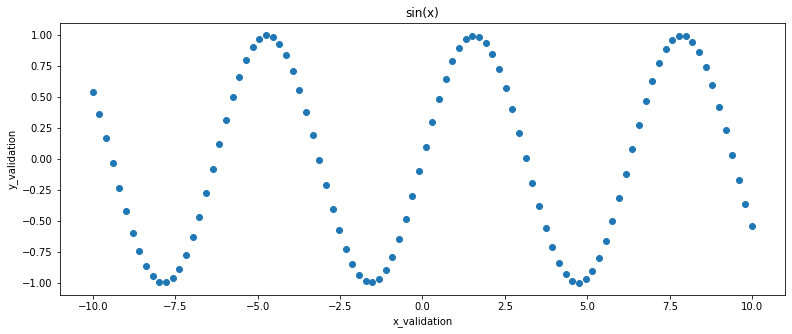

In [10]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [11]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [26]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [32]:
sine_net = SineNet(100)

# Prediction

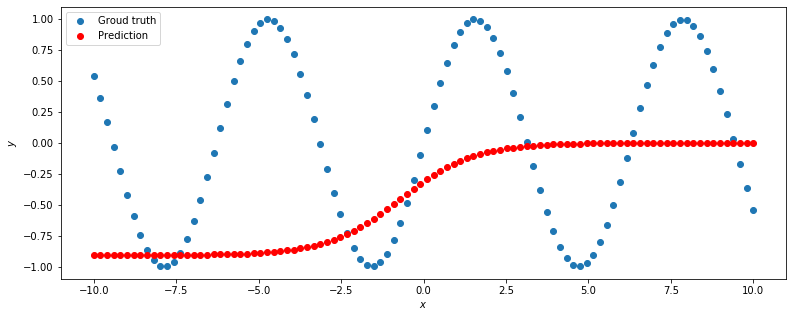

In [28]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Optimizer

In [33]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [30]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

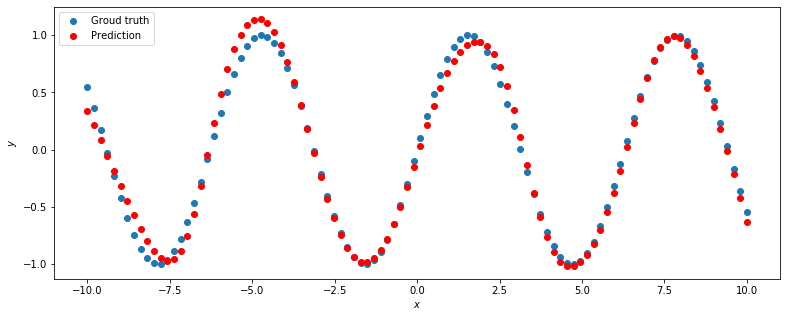

In [34]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [36]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [59]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

In [60]:
net = RegressionNet(50)

In [50]:
# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);
# ------Dataset preparation end--------:

In [61]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [42]:
def mse_loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()

In [62]:
for epoch_index in range(1000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = mse_loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

In [45]:
def prediction_graph(net,x_train,y_train,x_validation,y_validation):
    y_pred = net.forward(x_validation)

    plt.plot(x_train.numpy(), y_train.numpy(), 's', c='orange', label='Train')
    plt.plot(x_validation.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    plt.plot(x_validation.numpy(), y_validation.numpy(), 'x-', c='b', label='Validation');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

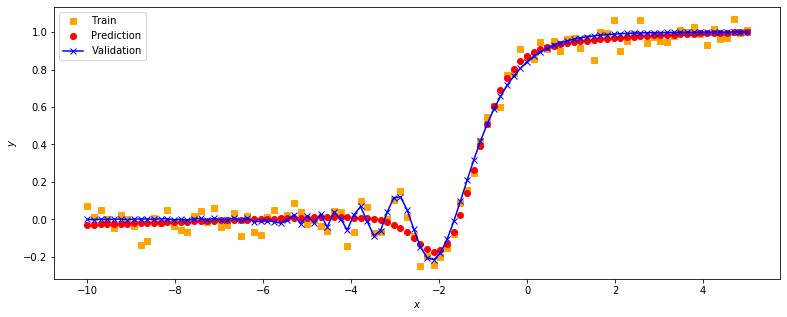

In [63]:
prediction_graph(net,x_train,y_train,x_validation,y_validation)

In [47]:
# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()

In [64]:
print(metric(net.forward(x_validation), y_validation).item())

0.02552696317434311
